## exe-1) 유방암 양성/음성 여부 판단을 위한 모델 선정

In [144]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [145]:
breast_cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [146]:
import pandas as pd
import numpy as np

In [147]:
data = pd.DataFrame(breast_cancer_data['data'])
data.columns = breast_cancer_data['feature_names']
target = pd.DataFrame(breast_cancer_data['target'])
target.columns = ['target']

df = pd.concat([target,data],axis=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int32  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

### 데이터 분리하기

In [148]:
# 종속변수 독립변수 분리
data = df.iloc[:,1:].to_numpy()
target = df['target'].to_numpy()

# 훈련/테스트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.25, random_state=42)

print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(426, 30)
(143, 30)
(426,)
(143,)


## 로지스틱

In [26]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [27]:
target_0_1 = train_target[(train_target == 0) | \
                                  (train_target == 1)]
target_0_1.shape

train_0_1 = train_scaled[(train_target == 0) | \
                                  (train_target == 1)]
train_0_1.shape

(426, 30)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_0_1, target_0_1)
print("정확도 = ", lr.score(train_0_1, target_0_1))

print(lr.coef_, lr.intercept_)

정확도 =  0.9859154929577465
[[-0.39751679 -0.41535774 -0.34832129 -0.45142016 -0.20791905  0.62039231
  -0.73558933 -1.09376305  0.23601875  0.08357971 -1.28501592  0.22136641
  -0.58858571 -0.89527827 -0.19689721  0.63403697 -0.14135554 -0.40058728
   0.5262862   0.73327971 -0.84378886 -1.29571675 -0.51790962 -0.82723207
  -0.53895662  0.12288567 -1.00748469 -0.76642547 -1.21963558 -0.14580732]] [0.54105702]


## 결정트리
##### - 최적의 max_depth값 확인 필요 -> 6이 최적값으로 출력
##### 그리드서치 진행 후 

In [169]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6,random_state=42)
dt.fit(train_scaled, train_target)
print("훈련정확도=", dt.score(train_scaled, train_target))
print("테스트정확도=", dt.score(test_scaled, test_target))

훈련정확도= 0.9976525821596244
테스트정확도= 0.951048951048951


### 변수중요도 확인

In [151]:
list = dt.feature_importances_
list

array([0.        , 0.02601101, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69593688, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01277192, 0.00155458,
       0.        , 0.00670697, 0.01702539, 0.        , 0.        ,
       0.0877369 , 0.10787925, 0.        , 0.03452044, 0.00985664,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [121]:
df_fnames = pd.DataFrame(breast_cancer_data['feature_names'])
list = dt.feature_importances_
df_list = pd.DataFrame(list)
df_concat = pd.concat([df_fnames, df_list], axis=1)
# np.sort(list)[::-1]
df_concat.columns=['name', 'importances']
df_concat.sort_values('importances', ascending=False).head(10)

,name,importances
7,mean concave points,0.695937
21,worst texture,0.107879
20,worst radius,0.087737
23,worst area,0.034520
1,mean texture,0.026011
17,concave points error,0.017025
13,area error,0.012772
24,worst smoothness,0.009857
16,concavity error,0.006707
14,smoothness error,0.001555


In [122]:
# 독립변수 선택하기
data = df[['mean concave points', 'worst texture', 'worst radius']].to_numpy()
target = df['target'].to_numpy()

# 훈련/테스트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.25, random_state=42)

print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(426, 3)
(143, 3)
(426,)
(143,)


### 그리드서치

In [168]:
# 최적의 max_depth값 찾기
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
params = {"max_depth" : range(5, 20, 1)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                 params, n_jobs = -1, cv = splitter)
gs.fit(train_input, train_target)
print("최종 score = ", np.mean(scores["test_score"]))

최종 score =  0.9365800273597811


In [166]:
print(gs.best_estimator_)

DecisionTreeClassifier(max_depth=6, random_state=42)


In [167]:
df_params = pd.DataFrame(gs.cv_results_["params"])
df_total = pd.DataFrame()
for i in range(0,5,1):
    df_score = pd.DataFrame(gs.cv_results_[f"split{i}_test_score"])
    df_total = pd.concat([df_total, df_score],axis=1)
df_total
df = pd.concat([df_params, df_total], axis=1)
df.columns=['max_depth',0,1,2,3,4]
df.head(5)

,max_depth,0,1,2,3,4
0,5,0.967213,0.95082,0.950820,0.901639,0.901639
1,6,0.967213,0.95082,0.967213,0.918033,0.901639
2,7,0.950820,0.95082,0.967213,0.918033,0.901639
3,8,0.950820,0.95082,0.967213,0.901639,0.901639
4,9,0.950820,0.95082,0.967213,0.901639,0.901639


### 교차검증

In [162]:
# 교차검증
from sklearn.model_selection import cross_validate

# dt : 결정트리 훈련모델(다른 모델을 사용한 경우 해당 모델)
# 두번째값 : 훈련데이터(fold에서 훈련데이터 쪼갤때 사용)
scores = cross_validate(dt, train_input, train_target,
                       return_train_score=True)
# print(scores)

### 딕셔너리의 test_score의 평균값이 최종 훈련모델의 평가점수(정확도)
import numpy as np
print("최종 score = ", np.mean(scores["train_score"]), np.mean(scores["test_score"]))

최종 score =  0.9988269794721407 0.9365800273597811


## 경사하강법
##### - 최적의 max_iter값 확인 필요
##### max_iter : 100

In [33]:
from sklearn.linear_model import SGDClassifier

# 클래스(모델) 생성
sc = SGDClassifier(loss="log", max_iter=100, tol=None, random_state=42)

sc.fit(train_scaled,train_target)

print("훈련정확도 = ", sc.score(train_scaled, train_target))
print("테스트정확도 = ", sc.score(test_scaled, test_target))

훈련정확도 =  0.9882629107981221
테스트정확도 =  0.965034965034965


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [170]:
import numpy as np

sc = SGDClassifier(loss="log", random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) : 
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'

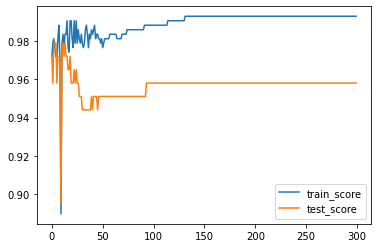

In [171]:
### 최적의 에포크 위치 확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

## 최근접 이웃(분류)
##### - 최적의 n_neighbors 값 확인필요

In [34]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scaled, train_target)

print("훈련정확도=", kn.score(train_scaled, train_target))

print("테스트정확도=", kn.score(test_scaled, test_target))

훈련정확도= 0.9835680751173709
테스트정확도= 0.958041958041958


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

## RandomForest

In [137]:
# 종속변수 독립변수 분리
data = df.iloc[:,1:].to_numpy()
target = df['target'].to_numpy()

# 훈련/테스트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.25, random_state=42)

print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)

from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target,
                       return_train_score=True, n_jobs = -1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

1.0 0.9577291381668946


In [139]:
# 모델 훈련
rf.fit(train_input, train_target)

# 특성 중요도 조회하기
print(rf.feature_importances_)

[0.03971058 0.01460399 0.05314639 0.04277978 0.00816485 0.01140166
 0.08321459 0.0902992  0.00443533 0.00443395 0.01951684 0.00459978
 0.00868228 0.04355077 0.00464415 0.0036549  0.00701442 0.00504716
 0.00371411 0.00658253 0.08127686 0.01649014 0.07138828 0.12319232
 0.01033481 0.01580059 0.03174022 0.17229521 0.01310266 0.00518165]


In [140]:
df_fnames = pd.DataFrame(breast_cancer_data['feature_names'])
list = rf.feature_importances_
df_list = pd.DataFrame(list)
df_concat = pd.concat([df_fnames, df_list], axis=1)
# np.sort(list)[::-1]
df_concat.columns=['name', 'importances']
df_concat.sort_values('importances', ascending=False).head(5)
# df_concat.sort_values('importances', ascending=False).tail(5)

,name,importances
27,worst concave points,0.172295
23,worst area,0.123192
7,mean concave points,0.090299
6,mean concavity,0.083215
20,worst radius,0.081277


In [141]:
# 독립변수 선택하기
data = df[['worst concave points', 'worst area', 'mean concave points', 'texture error', 'mean symmetry', 'mean fractal dimension']].to_numpy()
target = df['target'].to_numpy()

# 훈련/테스트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.25, random_state=42)

print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(426, 6)
(143, 6)
(426,)
(143,)


In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)

from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target,
                       return_train_score=True, n_jobs = -1)
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

1.0 0.9436114911080711


## 엑스트라 트리(Extra Tree)

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_jobs=1, random_state=42)
scores = cross_validate(etc, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

scores
print(scores["train_score"].mean(), scores["test_score"].mean())

1.0 0.9623803009575924


In [55]:
etc.fit(train_input, train_target)
print(etc.feature_importances_)

[0.06526478 0.02263436 0.04037335 0.04137443 0.01127867 0.03141925
 0.06792653 0.07436193 0.00680299 0.00864427 0.01592531 0.00632018
 0.01699375 0.0355914  0.00717712 0.0077469  0.00781951 0.01101074
 0.00687928 0.00718805 0.10172404 0.02771603 0.10386939 0.06440105
 0.01958991 0.02389705 0.05887149 0.08507095 0.01407766 0.00804961]


## Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

scores
print(scores["train_score"].mean(), scores["test_score"].mean())

1.0 0.9506703146374831


In [57]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[7.86833960e-04 2.15961763e-02 5.42802085e-04 4.71132208e-05
 1.47023648e-04 4.08945086e-03 2.87739793e-05 4.74446423e-01
 4.80869688e-04 1.52187815e-04 6.86736592e-03 6.94963601e-03
 5.82945151e-04 8.03897009e-03 7.26816483e-04 2.10782374e-03
 1.28862568e-02 9.61166277e-03 7.87058692e-04 1.98199901e-03
 6.56563387e-02 4.86313930e-02 3.03435540e-02 4.38122164e-02
 4.09784590e-03 6.68395712e-04 1.65128368e-02 2.35176733e-01
 2.15223505e-03 9.02615208e-05]


## 히스토그램 그레디언트 부스팅

In [58]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)

scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print(scores["train_score"].mean(), scores["test_score"].mean())

1.0 0.9600820793433653


## XGBoost

In [59]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method="hist", random_state=42)

scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print(scores["train_score"].mean(), scores["test_score"].mean())

1.0 0.9577017783857729


## LightGBM

In [60]:
from lightgbm import LGBMClassifier

lc = LGBMClassifier()

scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print(scores["train_score"].mean(), scores["test_score"].mean())

1.0 0.9577017783857729


In [61]:
### 결과 (독립변수 29개)
# 1. 로지스틱 
# 정확도 =  0.9859154929577465
# 2. 결정트리
# 훈련정확도= 0.9976525821596244
# 테스트정확도= 0.951048951048951
# 3. 경사하강법
# 훈련정확도 =  0.9882629107981221
# 테스트정확도 =  0.965034965034965
# 4. KNN
# 훈련정확도= 0.9835680751173709
# 테스트정확도= 0.958041958041958
# 5. RF
# 1.0 0.9577291381668946
# 6. 엑스트라 트리(Extra Tree)
# 1.0 0.9623803009575924
# 7. Gradient Boosting
# 1.0 0.9506703146374831
# 8. 히스토그램 그레디언트 부스팅
# 1.0 0.9600820793433653
# 9. XGBoost
# 1.0 0.9577017783857729
# 10. LightGBM
# 1.0 0.9577017783857729

In [ ]:
## 선택 모델 : 경사하강법
# - 훈련정확도와 테스트 정확도의 격차가 가장 적으며(일반화가 잘된 모델로 생각)
# - 테스트 정확도가 0.965로 비교적 높은 편이라고 생각하므로
# - 경사하강법을 선택
# - 경사하강법의 최적의 epoch를 선택하기 위해 그래프 시각화를 진행
# - 최적의 max_iter = 100으로 선택
# 선택한 경사하강법의 최종 적확도는
# 훈련정확도 =  0.9882629107981221
# 테스트정확도 =  0.965034965034965 입니다.